In [2]:
import os

import numpy as np
import networkx as nx
import pandas as pd
import community
import matplotlib.pyplot as plt
datapath = "..\data"

In [3]:
G_book = nx.read_gpickle(os.path.join(datapath, "book.nxgraph"))
G_reddit = nx.read_gpickle(os.path.join(datapath, "asoiaf_data_cleaned.nxgraph"))

# Perform community detection on the book graph

Modularity: 0.16879966414830913


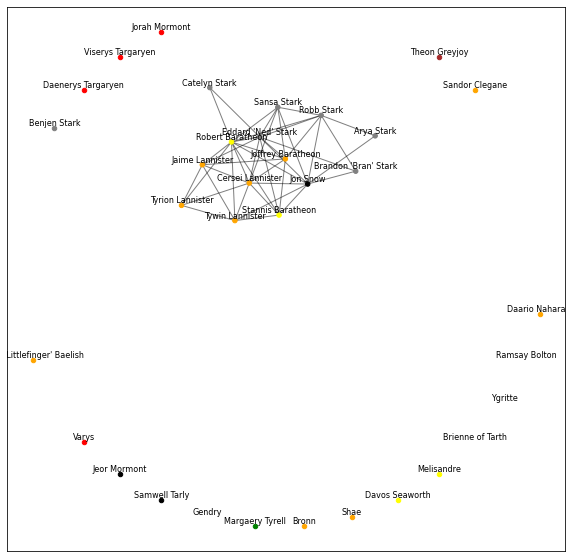

In [7]:
# Remove weaker edges from the graph
G_book_clean = G_book.copy()
book_weight_cutoff = 0.22
G_book_clean.remove_edges_from([e for e, w in nx.get_edge_attributes(G_book_clean,'weight').items() if w < book_weight_cutoff])

#first compute the best partition
partition = community.best_partition(G_book_clean)
#drawing
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
size = float(len(set(partition.values())))
#pos = nx.spring_layout(G_reddit_clean)
pos = nx.kamada_kawai_layout(G_book_clean)
count = 0.
parts = []
for com, i in enumerate(set(partition.values())):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    parts.append(list_nodes)
    node_color = [nx.get_node_attributes(G_book_clean, "colour")[c] for c in list_nodes]
    nx.draw_networkx_nodes(G_book_clean, pos, list_nodes, node_size = 20, node_color = node_color, ax = ax)

print(f"Modularity: {nx.algorithms.community.quality.modularity(G_book_clean, parts)}")
nx.draw_networkx_edges(G_book_clean, pos, alpha=0.5, ax = ax)
nx.draw_networkx_labels(G_book_clean, pos, font_size = 8, verticalalignment = "bottom", ax = ax)
plt.show()

# Community detection on the reddit graph

{"Brandon 'Bran' Stark": 11, 'Jon Snow': 1, "Petyr 'Littlefinger' Baelish": 11, 'Varys': 14, 'Cersei Lannister': 14, "Eddard 'Ned' Stark": 13, 'Daenerys Targaryen': 14, 'Tywin Lannister': 14, 'Margaery Tyrell': 8, 'Brienne of Tarth': 1, 'Sansa Stark': 11, 'Catelyn Stark': 11, 'Sandor Clegane': 12, 'Robert Baratheon': 13, 'Jaime Lannister': 14, 'Arya Stark': 11, 'Theon Greyjoy': 1, 'Gendry': 3, 'Joffrey Baratheon': 4, 'Tyrion Lannister': 14, 'Jorah Mormont': 5, 'Samwell Tarly': 1, 'Melisandre': 1, 'Davos Seaworth': 1, 'Stannis Baratheon': 1, 'Daario Naharais': 6, 'Robb Stark': 13, 'Viserys Targaryen': 7, 'Benjen Stark': 9, 'Bronn': 10, 'Shae': 15, 'Ramsay Bolton': 1, 'Ygritte': 0, 'Jeor Mormont': 2}
Modularity: 0.0177723150721676


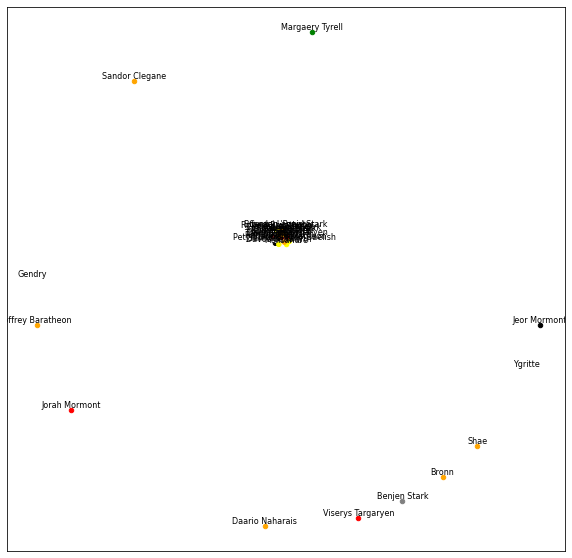

In [46]:
# Remove weaker edges from the graph
G_reddit_clean = G_reddit.copy()
reddit_weight_cutoff = 0.015
G_reddit_clean.remove_edges_from([e for e, w in nx.get_edge_attributes(G_reddit_clean,'weight').items() if w < reddit_weight_cutoff])

#first compute the best partition
partition = community.best_partition(G_reddit_clean)
#drawing
fig, ax = plt.subplots(1, 1,figsize=(10, 10))
size = float(len(set(partition.values())))
#pos = nx.spring_layout(G_reddit_clean)
pos = nx.kamada_kawai_layout(G_reddit_clean)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    node_color = [nx.get_node_attributes(G_book_clean, "colour")[c] for c in list_nodes]
    nx.draw_networkx_nodes(G_book_clean, pos, list_nodes, node_size = 20, node_color = node_color, ax = ax)

print(f"Modularity: {nx.algorithms.community.quality.modularity(G_reddit_clean, parts)}")
nx.draw_networkx_edges(G_reddit_clean, pos, alpha=0.5, ax = ax)
nx.draw_networkx_labels(G_reddit_clean, pos, font_size = 8, verticalalignment = "bottom", ax = ax)
plt.show()

In [51]:
# Make list of sets, where each set is a grouping of a faction
node_color = [nx.get_node_attributes(G_book, "colour")[c] for c in G_book.nodes]
factions = pd.Series(range(len(node_color))).groupby(node_color, sort=False).apply(list).tolist()
for faction in factions:
    for i, index in enumerate(faction):
        faction[i] = list(G_book.nodes)[index]


partition = {}
for i, faction in enumerate(factions):
    for fact in faction:
        partition[fact] = i
print(partition)
        
#print(partition)
#print(f"Modularity: {nx.algorithms.community.quality.modularity(G_book, partition)}")
#nx.draw(G_book, node_color = node_color)

[['Jon Snow', 'Jeor Mormont', 'Samwell Tarly'], ['Robert Baratheon', 'Stannis Baratheon', 'Davos Seaworth', 'Melisandre'], ["Eddard 'Ned' Stark", 'Robb Stark', "Brandon 'Bran' Stark", 'Sansa Stark', 'Arya Stark', 'Catelyn Stark', 'Benjen Stark'], ['Sandor Clegane', 'Cersei Lannister', 'Tyrion Lannister', 'Jaime Lannister', 'Tywin Lannister', 'Joffrey Baratheon', "Petyr 'Littlefinger' Baelish", 'Bronn', 'Shae', 'Daario Naharais'], ['Theon Greyjoy'], ['Jorah Mormont', 'Viserys Targaryen', 'Daenerys Targaryen', 'Varys'], ['Gendry', 'Brienne of Tarth', 'Ygritte', 'Ramsay Bolton'], ['Margaery Tyrell']]
{'Jon Snow': 0, 'Jeor Mormont': 0, 'Samwell Tarly': 0, 'Robert Baratheon': 1, 'Stannis Baratheon': 1, 'Davos Seaworth': 1, 'Melisandre': 1, "Eddard 'Ned' Stark": 2, 'Robb Stark': 2, "Brandon 'Bran' Stark": 2, 'Sansa Stark': 2, 'Arya Stark': 2, 'Catelyn Stark': 2, 'Benjen Stark': 2, 'Sandor Clegane': 3, 'Cersei Lannister': 3, 'Tyrion Lannister': 3, 'Jaime Lannister': 3, 'Tywin Lannister': 3, '